Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = ""
STUDENTID = ""
GROUPID = "";TESTTESTTESTTESTTESTTESTTESTTESTTEST

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

In [ ]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv("final_processed_data.csv")  # adjust filename if needed

# Filter for 2014 and 2019
df_2014 = df[df['year'] == 2014][['eli_pct', 'abmi_pct']].dropna()
df_2019 = df[df['year'] == 2019][['eli_pct', 'abmi_pct']].dropna()

# --- Calculations ---
# Manually compute Pearson correlation
r_2014 = df_2014['eli_pct'].corr(df_2014['abmi_pct'])
r_2019 = df_2019['eli_pct'].corr(df_2019['abmi_pct'])

# Compute regression lines (y = mx + b) using numpy.polyfit
m_2014, b_2014 = np.polyfit(df_2014['eli_pct'], df_2014['abmi_pct'], 1)
m_2019, b_2019 = np.polyfit(df_2019['eli_pct'], df_2019['abmi_pct'], 1)

# --- Plotting (Merged using Matplotlib only) ---
plt.figure(figsize=(10, 7)) # Create a single figure

# Scatter plot points for 2014
plt.scatter(
    df_2014['eli_pct'],
    df_2014['abmi_pct'],
    alpha=0.4,                   # Transparency for overlap
    label=f'2014 Data (r={r_2014:.2f})', # Label for the legend
    color='tab:green'             # Specify color
)

# Scatter plot points for 2019
plt.scatter(
    df_2019['eli_pct'],
    df_2019['abmi_pct'],
    alpha=0.4,                   # Transparency for overlap
    label=f'2019 Data (r={r_2019:.2f})', # Label for the legend
    color='tab:purple',          # Specify a different color
    marker='^'                   # Optional: use a different marker shape
)

# Generate points for regression lines spanning the data range
min_eli = df['eli_pct'].min()
max_eli = df['eli_pct'].max()
x_vals = np.array([min_eli, max_eli]) # Only need two points to define a line

# Calculate corresponding y-values for each regression line
y_vals_2014 = m_2014 * x_vals + b_2014
y_vals_2019 = m_2019 * x_vals + b_2019

# Plot regression line for 2014
plt.plot(
    x_vals,
    y_vals_2014,
    color='black',            # Match scatter color
    linestyle='--',              # Dashed line style
    linewidth=2,                 # Make line slightly thicker
    label='2014 Regression Line' # Label for the legend
)

# Plot regression line for 2019
plt.plot(
    x_vals,
    y_vals_2019,
    color='black',          # Match scatter color
    linestyle='-',               # Solid line style
    linewidth=2,                 # Make line slightly thicker
    label='2019 Regression Line' # Label for the legend
)

# --- Formatting ---
plt.title('Inverse Relationship Between Extremely Low-Income and Above-Moderate Income Households (2014 vs 2019)')
plt.xlabel('Extremely Low Income % (ELI)')
plt.ylabel('Above Moderate Income % (ABMI)')

# Set axis limits to start from 0, extending slightly beyond max data point
plt.xlim(left=0, right=max_eli * 1.05)
# ***** CORRECTED LINE *****
plt.ylim(bottom=0, top=df['abmi_pct'].max() * 1.05) # Use 'top' instead of 'right'

plt.grid(True, alpha=0.5)    # Add a grid for easier reading
plt.legend()                 # Display the legend based on the 'label' arguments
plt.tight_layout()           # Adjust layout to prevent labels overlapping
plt.show()                   # Display the plot



Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

Matplotlib is building the font cache; this may take a moment.


Attempting to load data from: data/data_notebook-notebook-1_dataset2.json
Successfully loaded 10000 records.
10000 records remaining after date cleaning.
Top 5 Crime Types determined: ['BATTERY - SIMPLE ASSAULT', 'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)']
3771 records belong to the top 5 crime types.

Data prepared for plotting (first 5 rows):
crm_cd_desc  BATTERY - SIMPLE ASSAULT  BURGLARY  BURGLARY FROM VEHICLE  \
date_occ                                                                 
2012-01-31                          0         0                      1   
2012-02-29                          0         1                      0   
2012-08-31                          0         1                      0   
2012-10-31                          0         0                      0   
2012-12-31                          2         4                      0   

crm_cd_desc  THEFT PLAIN - PETTY ($950 & UNDER)  VEHICLE - STOLEN  
date_occ       

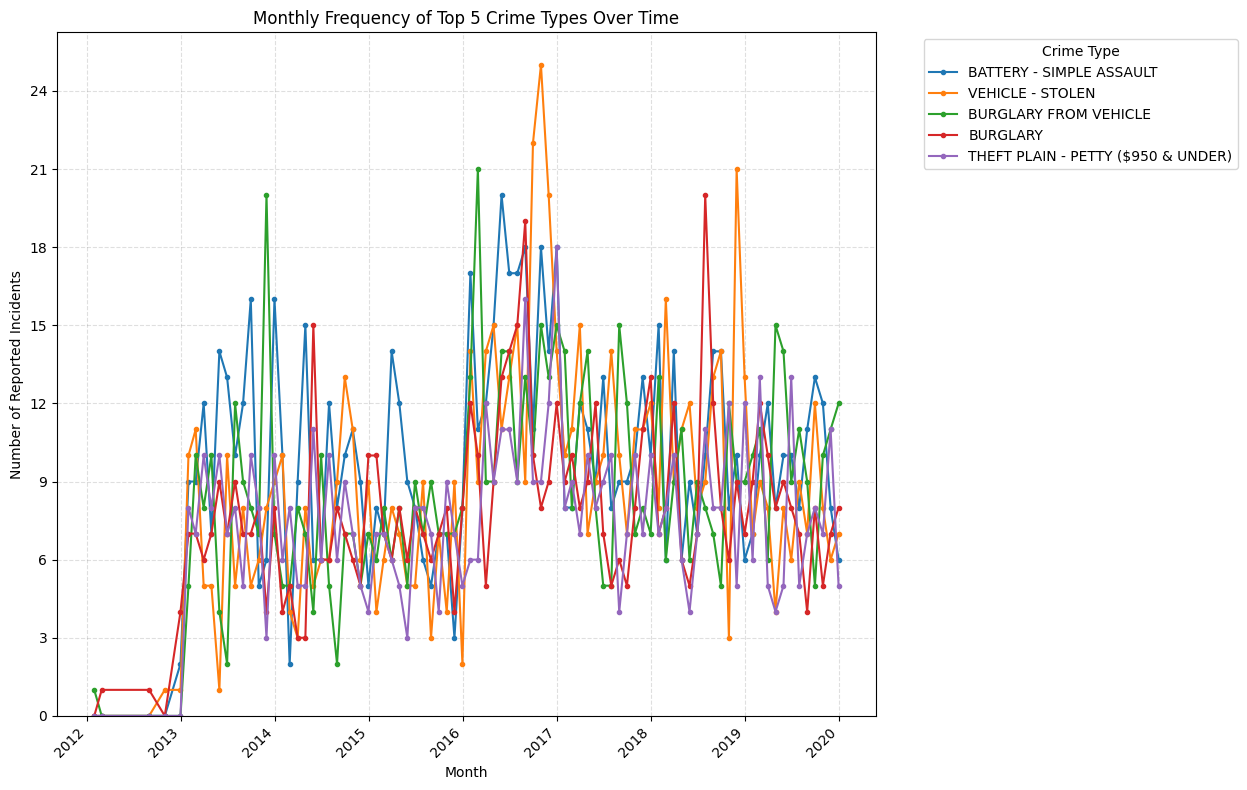

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os  # Import os module for path manipulation

# --- Define File Path ---
data_folder = 'data'
file_name = 'data_notebook-notebook-1_dataset2.json'
# Construct the full path regardless of operating system
file_path = os.path.join(data_folder, file_name)

try:
    # --- Data Loading from JSON ---
    print(f"Attempting to load data from: {file_path}")
    # Use pd.read_json to load the file
    # Assumes the JSON is a list of records (dictionaries)
    df = pd.read_json(file_path)
    print(f"Successfully loaded {len(df)} records.")
    # Optional: Display first few rows and columns to verify
    # print("DataFrame columns:", df.columns.tolist())
    # print("First 5 rows:\n", df.head())

    # --- Data Processing ---

    # Make sure the required columns exist
    required_cols = ['crm_cd_desc', 'date_occ']
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        raise ValueError(f"Missing required columns in JSON file: {missing}")

    # 1. Convert 'date_occ' to datetime objects, coercing errors
    df['date_occ'] = pd.to_datetime(df['date_occ'], errors='coerce')
    # Remove rows where date conversion failed or date is missing
    df.dropna(subset=['date_occ'], inplace=True)
    print(f"{len(df)} records remaining after date cleaning.")

    # 2. Find the overall Top 5 crime types
    # Handle potential NaN/None values in crime description before value_counts
    df.dropna(subset=['crm_cd_desc'], inplace=True)
    crime_counts = df['crm_cd_desc'].value_counts()
    if crime_counts.empty:
        print("No crime descriptions found after cleaning. Cannot proceed.")
        exit()

    top_5_crime_list = crime_counts.head(5).index.tolist()
    print(f"Top 5 Crime Types determined: {top_5_crime_list}")

    # 3. Filter the DataFrame to include only the top 5 crimes
    df_top5 = df[df['crm_cd_desc'].isin(top_5_crime_list)].copy() # Use .copy() for safety
    print(f"{len(df_top5)} records belong to the top 5 crime types.")

    if df_top5.empty:
        print("No data records found for the top 5 crime types. Cannot create plot.")
        exit()

    # 4. Aggregate counts over time (e.g., monthly) for these crimes
    # Set date as index for easy resampling
    df_top5.set_index('date_occ', inplace=True)

    # Resample to monthly frequency ('ME' for Month End) and count occurrences per crime type
    # Use 'ME' for Month End frequency. Adjust 'YE' for Year End, 'QE' for Quarter End etc. if needed.
    # Group temporary by the resampled index AND the crime description
    crime_over_time = df_top5.groupby([pd.Grouper(freq='ME'), 'crm_cd_desc']).size()

    # 5. Restructure data for plotting: Use unstack() to turn crime types into columns
    # This creates a DataFrame where rows are time periods and columns are crime types
    crime_pivot = crime_over_time.unstack(level='crm_cd_desc', fill_value=0)

    # Ensure all top 5 crimes are columns, even if they had 0 counts in some periods
    for crime in top_5_crime_list:
        if crime not in crime_pivot.columns:
            crime_pivot[crime] = 0 # Add the column with zeros if missing

    # --- Visualization ---
    if crime_pivot.empty:
         print("No data available for the top 5 crimes in the selected time range to plot.")
    else:
        print("\nData prepared for plotting (first 5 rows):")
        print(crime_pivot.head())
        print(f"\nPlotting data from {crime_pivot.index.min()} to {crime_pivot.index.max()}")

        # Create the line chart
        ax = crime_pivot[top_5_crime_list].plot(kind='line', figsize=(15, 8), marker='.') # Added markers

        # --- Customize Plot ---
        ax.set_title('Monthly Frequency of Top 5 Crime Types Over Time')
        ax.set_xlabel('Month')
        ax.set_ylabel('Number of Reported Incidents')
        # Place legend outside of the plot area to avoid obscuring lines
        ax.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, linestyle='--', which='major', color='grey', alpha=.25) # Fainter grid lines

        # Ensure y-axis shows integer counts starting from 0
        ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.set_ylim(bottom=0)

        plt.xticks(rotation=45, ha='right') # Rotate labels and align them
        # Adjust layout automatically to make space for labels and legend
        # The rect parameter shrinks the plot area slightly to fit the legend: [left, bottom, right, top]
        plt.tight_layout(rect=[0, 0, 0.85, 1])

        # --- Display Plot ---
        plt.show()

# --- Error Handling ---
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    print("Please ensure the 'data' folder exists in the same directory as the script and contains the file.")
except ValueError as ve: # Catches errors from missing columns or date parsing issues
    print(f"Data Processing Error: {ve}")
except Exception as T:
    # Catch any other unexpected errors during loading or processing
    print(f"An unexpected error occurred: {T}")
    # print("Check JSON file format, permissions, and data integrity.")


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

In [ ]:
# YOUR CODE HERE

#raise NotImplementedError()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()